## Gradient Boosting:
- It also uses the idea of linearly combining weak learners.
- We can use it with other models apart from decision trees, but it works better with decision trees.
- Gradient Boosting uses the residual error for learning.


#### Gradient Boost vs AdaBoost:
- Larger Trees allowed in Gradient Boosting.
- Learning Rate coefficient same for all weak learners.
- Gradual series learning is based on training on the residuals of the previous model.
- Note, the learning rate is the same for each new  model in the series, it is not unique to each subsequent model (unlike AdaBoost's alpha coefficient).
- Gradient Boosting is fairly robust to overfitting, allowing for the number of estimators to be set high be default (º100)

#### Considerations:
- The trade-off is training time.
- A learning rate is between 0 and 1, which means a very low value would mean each subsequent tree has little to say meaning more trees need to be created, causing a longer computational time.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [12]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
X = df.drop('class', axis=1)

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
y = df['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'n_estimators': [50, 100],
             'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3,4,5],
             }

In [21]:
gb_model = GradientBoostingClassifier()

In [22]:
grid = GridSearchCV(gb_model, param_grid)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [25]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [27]:
predictions = grid.predict(X_test)

In [28]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [30]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.52172074e-16, 2.21503189e-17, 0.00000000e+00,
       7.13761378e-17, 1.04524302e-03, 1.18312069e-05, 5.06011038e-06,
       0.00000000e+00, 1.57192282e-17, 4.45515798e-18, 2.49345344e-20,
       1.56850665e-17, 2.85267978e-21, 0.00000000e+00, 1.60530529e-06,
       2.31055039e-03, 5.20885026e-02, 1.84253604e-04, 1.01380190e-02,
       1.82499853e-02, 1.88117221e-05, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 7.78699405e-18, 1.27312190e-02,
       1.08493591e-02, 0.00000000e+00, 2.49797723e-17, 0.00000000e+00,
       1.32168998e-17, 0.00000000e+00, 0.00000000e+00, 1.52786007e-17,
       2.77440319e-16, 4.69576919e-23, 4.36800450e-19, 2.44179998e-21,
       1.30388597e-17, 8.42442128e-04, 1.35976774e-01, 0.00000000e+00,
       1.94579377e-02, 3.67495311e-03, 3.61085297e-03, 4.95063766e-06,
       3.60117275e-05, 0.00000000e+00, 4.67931920e-02, 3.13940648e-03,
       0.00000000e+00, 0.00000000e+00, 3.46490365e-04, 0.00000000e+00,
      

In [31]:
feat_import = grid.best_estimator_.feature_importances_

In [32]:
imp_feat = pd.DataFrame(index=X.columns,
                       data=feat_import,
                        columns=['Importance']
                       )

In [35]:
imp_feat.sort_values(by='Importance', ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135977
bruises_t,0.052089
stalk-surface-below-ring_y,0.046793
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_w,0.000000
veil-color_o,0.000000
veil-color_w,0.000000
gill-color_e,0.000000


In [38]:
most_important_features = imp_feat[imp_feat['Importance'] > 0.005].sort_values(by='Importance', ascending=False)

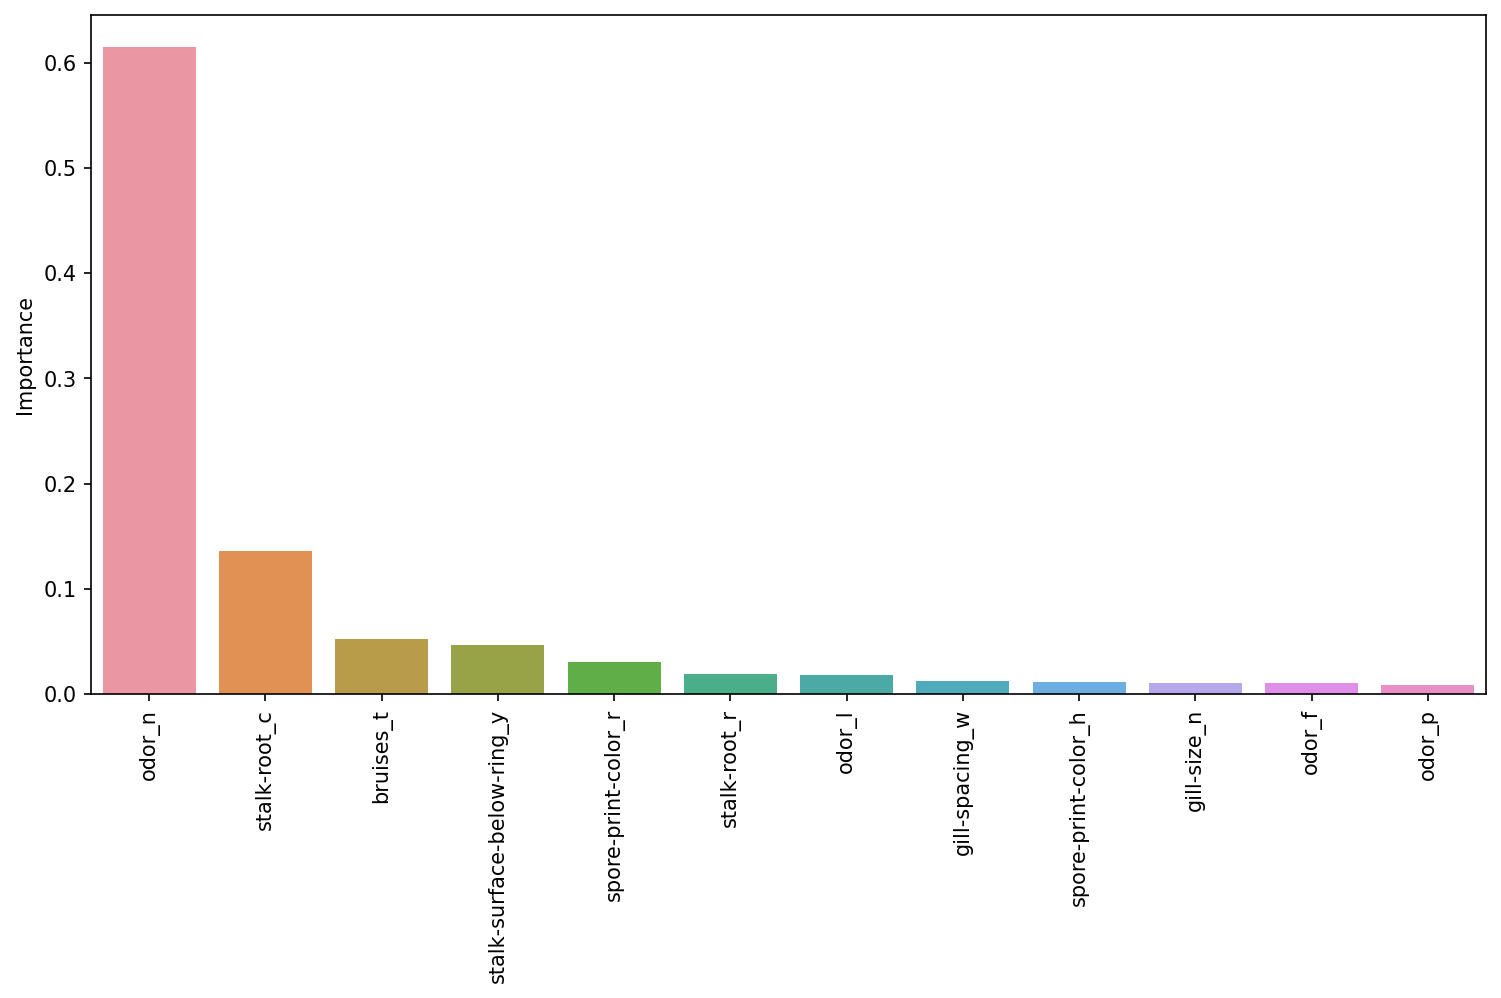

In [43]:

plt.figure(figsize=(12,6), dpi=150)
sns.barplot(data=most_important_features,
            x=most_important_features.index,
            y='Importance'
)

plt.xticks(rotation=90);